### Experiment - 7 | Huffman Coding
****
**EC39004: Digital Communication Laboratory** <br>
Irsh Vijay (Group 27)

In [1]:
from utils import *
%matplotlib inline

**Reading in the image**

In [39]:
FILEPATH = "tt.jpeg"
image = read_img(FILEPATH)

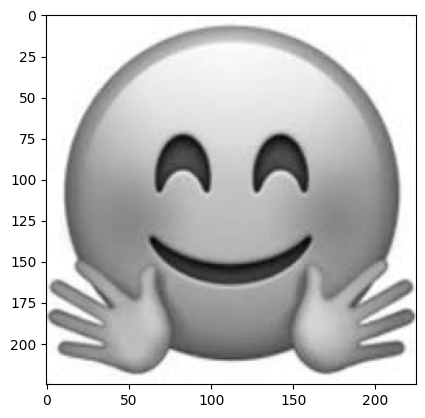

In [40]:
plt.imshow(image, cmap="gray")

**Generating Huffman Code**

In [41]:
transmitted = huffmanenco(image)

In [69]:
def bpsk_modulation(bits):
    phase_states = [0, np.pi]
    phase_signal = [phase_states[int(b)] for b in bits]
    phase_signal = np.repeat(phase_signal, 10)
    t = np.arange(0,len(phase_signal))/44e3
    fc = 1e3
    carrier_signal = np.sin(2*np.pi*fc*t+phase_signal)
    return carrier_signal, phase_signal

In [70]:
sins, phase = bpsk_modulation(transmitted)

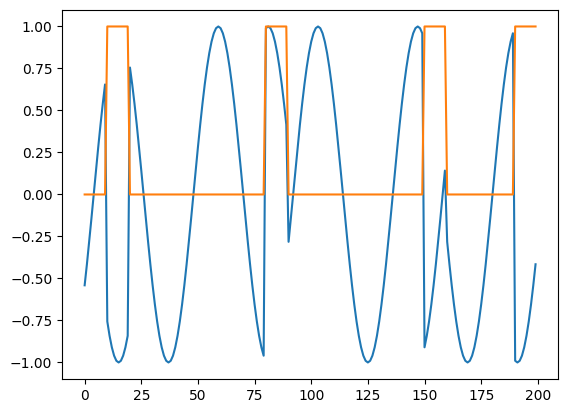

In [71]:
plt.plot(sins[306500:306700])
plt.plot(phase[306500:306700]//np.pi)
plt.show()

In [73]:
import scipy.io.wavfile
AMP = np.iinfo(np.int16).max
scipy.io.wavfile.write("exp7.wav", 44100, (AMP*sins).astype(np.int16))

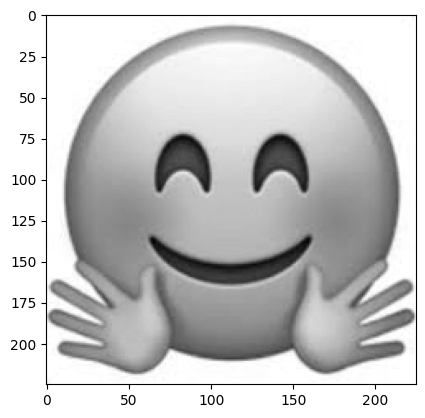

In [64]:
recovered_img = decoder(transmitted, image.shape[0], image.shape[1])

plt.imshow(recovered_img, cmap = "gray")